In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm

In [2]:

data = pd.read_csv('GOLD.csv')
df=pd.DataFrame(data)
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [3]:
df.set_index(df['Date'],inplace=True)
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
"May 04, 2017","May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017","May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017","May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017","May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017","May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
"Apr 26, 2019","Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
"Apr 30, 2019","Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
"May 01, 2019","May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305


In [4]:
df.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [5]:
df=df.dropna()
df.describe()

,Price,Open,High,Low,Pred,new
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,29934.956204,29931.501217,30051.121655,29817.895377,341.712895,237.811874
std,1004.074382,1003.263473,1012.606075,994.941509,271.075609,201.208916
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29220.500000,29221.500000,29344.500000,29111.000000,156.500000,100.716619
50%,29957.000000,29960.000000,30096.000000,29830.000000,299.000000,173.315183
75%,30705.000000,30700.000000,30837.500000,30580.000000,475.000000,308.057815
max,31895.000000,31877.000000,32075.000000,31725.000000,2210.000000,1121.430991


In [6]:
y = np.array(df["Pred"]).reshape(-1,1)
x = np.array(df["new"]).reshape(-1,1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [9]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Slope:' ,regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.06568219]]
Intercept: [339.84725187]
Root mean squared error:  53459.7576349458
R2 score:  -0.05387912274757656


Text(0, 0.5, 'new')

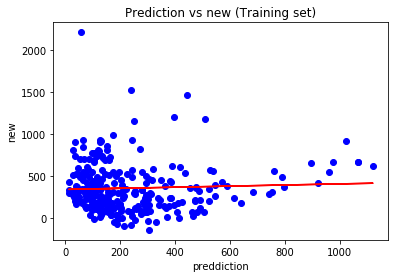

In [10]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Prediction vs new (Training set)')
plt.xlabel('preddiction')
plt.ylabel('new')

Text(0, 0.5, 'new')

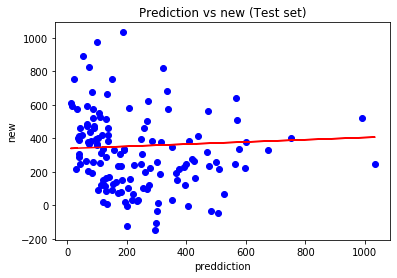

In [11]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.title('Prediction vs new (Test set)')
plt.xlabel('preddiction')
plt.ylabel('new')

In [12]:
pre_data = df[:]
pre_data_new = pre_data['new']
pre_data_new = pre_data_new.values.reshape(-1,1)
na_data = (regressor.predict(pre_data_new))#getting predicted values
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
df['Pred'] = sata
df

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
"May 04, 2017","May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,NaN,117.570740
"May 05, 2017","May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,NaN,295.430176
"May 08, 2017","May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,NaN,132.123714
"May 09, 2017","May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,NaN,101.298064
"May 10, 2017","May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,NaN,112.153318
...,...,...,...,...,...,...,...,...,...
"Dec 04, 2018","Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,NaN,301.615081
"Dec 05, 2018","Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,NaN,241.475101
"Dec 06, 2018","Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,NaN,188.222186


C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


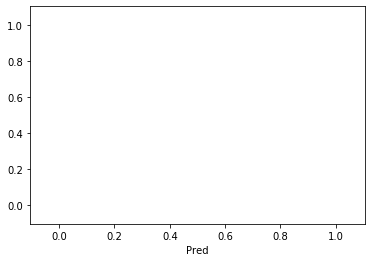

In [13]:

sns.distplot(df['Pred'])
plt.show()

In [16]:
cmp1 = pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\VENKEYS.csv")

cmp1['Date'] = pd.to_datetime(cmp1['Date'])
cmp1 = cmp1.sort_values('Date')
cmp1.set_index('Date', inplace=True)
df1=pd.DataFrame(cmp1)
df1

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,VENKEYS,EQ,1228.40,1167.00,1244.70,1167.00,1172.00,1169.70,1189.59,99659,1.185535e+08,5436,40813,40.95
2017-05-16,VENKEYS,EQ,1169.70,1169.70,1205.65,1135.00,1183.00,1177.00,1172.48,61572,7.219211e+07,4011,22051,35.81
2017-05-17,VENKEYS,EQ,1177.00,1177.00,1209.95,1174.20,1188.20,1188.00,1194.72,60769,7.260207e+07,2904,17361,28.57
2017-05-18,VENKEYS,EQ,1188.00,1183.00,1188.00,1150.00,1157.00,1156.90,1169.84,28629,3.349137e+07,1699,12506,43.68
2017-05-19,VENKEYS,EQ,1156.90,1161.70,1181.00,1141.15,1162.00,1161.65,1163.78,28520,3.319106e+07,1538,11738,41.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,VENKEYS,EQ,2014.90,2025.00,2057.80,1990.00,2013.80,2000.45,2027.54,36714,7.443911e+07,4129,11592,31.57
2019-05-08,VENKEYS,EQ,2000.45,1997.90,2000.45,1950.00,1956.75,1956.70,1971.81,29889,5.893555e+07,3671,12658,42.35
2019-05-09,VENKEYS,EQ,1956.70,1959.75,1977.95,1921.20,1925.05,1930.10,1946.26,35929,6.992725e+07,4586,13245,36.86


In [17]:
nifty_data = pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\Nifty50\Nifty50.csv")
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
df2=pd.DataFrame(nifty_data)

In [18]:
df2.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [19]:
x2 = df1[405:]
x3 = df2[405:]
y2 = x2['Close Price'].pct_change()
y3 = x3['Close'].pct_change()

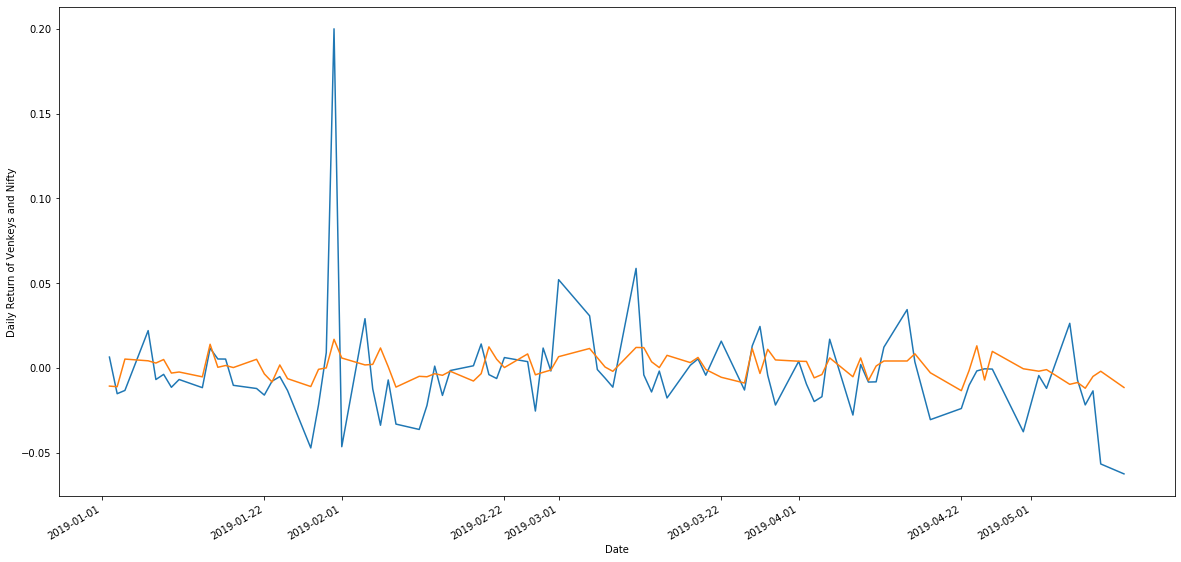

In [20]:
plt.figure(figsize=(20,10))
y2.plot()
y3.plot()
plt.ylabel("Daily Return of Venkeys and Nifty")
plt.show()

In [21]:
df1['pct_change'] = y2.pct_change()
df2['pct_change'] = y3.pct_change()

In [22]:
df1["pct_change"].dropna()
df2["pct_change"].dropna()

Date
2019-01-03    0.033676
2019-01-04   -1.463375
2019-01-07   -0.197429
2019-01-08   -0.320028
2019-01-09    0.741387
                ...   
2019-05-07   -0.111085
2019-05-08    0.391712
2019-05-09   -0.578529
2019-05-10   -0.600749
2019-05-13    4.719012
Name: pct_change, Length: 87, dtype: float64

In [23]:
myModel = sm.OLS(y,x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.355
Model:                            OLS   Adj. R-squared (uncentered):              0.354
Method:                 Least Squares   F-statistic:                              226.1
Date:                Mon, 27 Apr 2020   Prob (F-statistic):                    5.16e-41
Time:                        13:52:45   Log-Likelihood:                         -2990.8
No. Observations:                 411   AIC:                                      5984.
Df Residuals:                     410   BIC:                                      5988.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8348      0.056     15.037      0.000       0.726       0.944
==============================================================================
Omnibus:                       95.390   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.077
Skew:                           1.066   Prob(JB):                     4.59e-63
Kurtosis:                       6.496   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
venkey_data=pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\VENKEYS.csv",parse_dates=True, index_col='Date',)
nifty50_data = pd.read_csv(r"G:\harsh\ml\practice problems\stock_analysis\module2\dataset\Nifty50\Nifty50.csv",parse_dates=True, index_col='Date',)

monthly_prices = pd.concat([venkey_data['Close Price'], nifty50_data['Close']], axis=1)
monthly_prices.columns = ['VENKEYS', 'NIFTY50']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

            VENKEYS  NIFTY50
Date                        
2017-05-15  1169.70  9445.40
2017-05-16  1177.00  9512.25
2017-05-17  1188.00  9525.75
2017-05-18  1156.90  9429.45
2017-05-19  1161.65  9427.90
             VENKEYS   NIFTY50
Date                          
2017-05-16  0.006241  0.007078
2017-05-17  0.009346  0.001419
2017-05-18 -0.026178 -0.010109
2017-05-19  0.004106 -0.000164
2017-05-22  0.049972  0.001098


In [31]:
X = clean_monthly_returns['VENKEYS']
y = clean_monthly_returns['NIFTY50']


X1 = sm.add_constant(X)


model = sm.OLS(y, X1)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     53.41
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           1.11e-12
Time:                        13:58:53   Log-Likelihood:                 1758.3
No. Observations:                 493   AIC:                            -3513.
Df Residuals:                     491   BIC:                            -3504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.893      0.3

In [32]:

"""Venkeys is 0.8348 which is less than 1 and hence it is
 close to volatile than the benchmark"""

'Venkeys is 0.8348 which is less than 1 and hence it is\n close to volatile than the benchmark'

In [34]:
"""
 The monthly beta value for the stock VENKEYS is 0.0571
 which is less than 1 and hence it is less volatile
 than the benchmark
 """

'\n The monthly beta value for the stock VENKEYS is 0.0571\n which is less than 1 and hence it is less volatile\n than the benchmark\n '